In [1]:
%load_ext autoreload
%autoreload 2

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import h5py
from utils import get_eval_stats

In [9]:
trajectories = []
b = "0.001"
target_protein = "7JJK"
p_range = range(5, 10)

hdf5_data = '/home/shai/BLISS_Experiments/DRAKES/DRAKES/drakes_protein/fmif/eval_results/hdf5_data/mh_trajectories.hdf5'
with h5py.File(hdf5_data, 'r') as f:
    protein_name = "_" + target_protein if target_protein is not None else ""
    for p in p_range:
        name = f"p0.{p}_b{b}_n50{protein_name}"
        data = f[name][:] # type: ignore
        trajectories.append(data)

with h5py.File(hdf5_data, 'r') as f:
    name = "p0.7_b0.001_n50_2KRU"
    data = f[name][:] # type: ignore

In [10]:
test_dir = "/home/shai/BLISS_Experiments/DRAKES/DRAKES/drakes_protein/fmif/eval_results/test/"
drakes_df = pd.read_csv(test_dir + "drakes_test.csv")
pretrained_df = pd.read_csv(test_dir + "pretrained_test.csv")
bon10_df = pd.read_csv(test_dir + "pretrained_test_ddg_bon_N=10.csv")
bon50_df = pd.read_csv(test_dir + "pretrained_test_ddg_bon_N=50.csv")
summary_func = np.mean
drakes_eval_stats = get_eval_stats(drakes_df, target_protein="7JJK", summary_func=summary_func)
pre_eval_stats = get_eval_stats(pretrained_df, target_protein="7JJK", summary_func=summary_func)
bon10_eval_stats = get_eval_stats(bon10_df, target_protein="7JJK", summary_func=summary_func)
bon50_eval_stats = get_eval_stats(bon50_df, target_protein="7JJK", summary_func=summary_func)
drakes_ddg_align = drakes_eval_stats['ddg_align']
pre_ddg_align = pre_eval_stats['ddg_align']
bon10_ddg_align = bon10_eval_stats['ddg_align']
bon50_ddg_align = bon50_eval_stats['ddg_align']

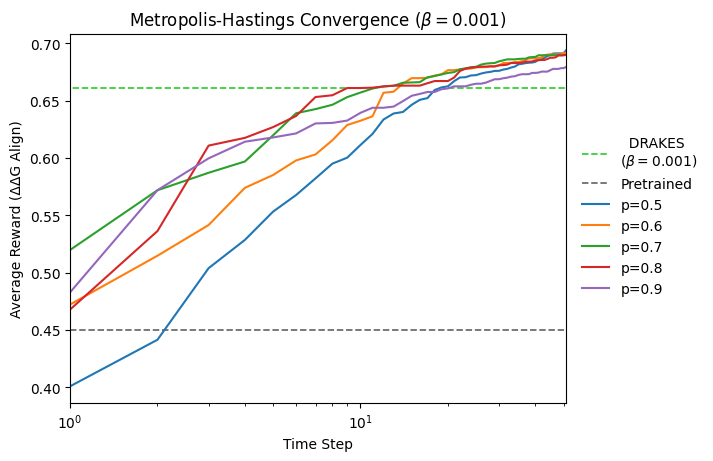

In [11]:
step_nums = range(1, len(trajectories[0]) + 1)

fig, ax = plt.subplots()
beta_str = r"($\beta=0.001$)"
ax.hlines(drakes_ddg_align, 0, 9, color='limegreen', linestyle='--', label=f'  DRAKES \n{beta_str}',linewidth=1.25)
ax.hlines(drakes_ddg_align, 20, 55, color='limegreen', linestyle='--',linewidth=1.25)
ax.axhline(pre_ddg_align, color='dimgray', linestyle='--', label='Pretrained', linewidth=1.25)
# ax.hlines(bon50_ddg_align, 0, 20, color='mediumslateblue', linestyle='--', label='BoN-50', linewidth=1.25)
# ax.hlines(bon10_ddg_align, 0, 6, color='mediumorchid', linestyle='--', label='BoN-10', linewidth=1.25)
# ax.hlines(bon50_ddg_align, 45, 55, color='mediumslateblue', linestyle='--', linewidth=1.25)
# ax.hlines(bon10_ddg_align, 14, 55, color='mediumorchid', linestyle='--', linewidth=1.25)

for i, traj in enumerate(trajectories):
    ax.plot(step_nums, traj, label=f"p=0.{i + 5}")

ax.legend(loc='center', bbox_to_anchor=(1.015, 0.5), bbox_transform=fig.transFigure, frameon=False)
ax.set(xlim=(1, len(trajectories[0])))

plt.xlabel("Time Step")
plt.xscale("log")
plt.ylabel("Average Reward (ΔΔG Align)")
plt.title(r"Metropolis-Hastings Convergence ($\beta=0.0 01$)")
plt.show()